# Neural network to approximate Runge's function

In [1]:
# Imports
import autograd.numpy as np  # We need to use this numpy wrapper to make automatic differentiation work later
from autograd import grad, elementwise_grad
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import (
    PolynomialFeatures,
)

from functions import runge, OLS_parameters, MSE
from functions import ReLU, ReLU_der, sigmoid, sigmoid_der, softmax, softmax_vec, mse_der
from functions import MSE, NeuralNetwork, identity, identity_der, R2

In [2]:
np.random.seed(42)
n = 1000
# data set from project 1
x = np.linspace(-1,1, n).reshape(-1,1)
y = runge(x) + 0.1*np.random.normal(0,1, x.shape)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
y_offset = y_train.mean()

poly = PolynomialFeatures(degree=10)
X_train = poly.fit_transform(x_train)
X_test = poly.fit_transform(x_test)
# scaling
scaler = StandardScaler()
scaler.fit(X_train)
X_train_s = scaler.transform(X_train)
X_test_s = scaler.transform(X_test)

# OLS
beta = OLS_parameters(X_train_s, y_train)
y_test_tilde = X_test_s @ beta + y_offset
y_train_tilde = X_train_s @ beta + y_offset

In [3]:
layer_output_sizes = [50, 1]
activation_funcs = [sigmoid, identity]
activation_ders = [sigmoid_der, identity_der]

scaler.fit(x_train)
x_train_s = scaler.transform(x_train)
x_test_s = scaler.transform(x_test)
inputs = x_train_s
targets = y_train + y_offset

NN = NeuralNetwork(
    x_train_s,
    targets,
    layer_output_sizes,
    activation_funcs,
    activation_ders,
    MSE,
    mse_der,
)

NN.train_network(
    epochs=1000,
    learning_rate=0.01,
    minibatch_size=15,
    momentum=0.9,
)

In [4]:
# layer_output_sizes = [50, 1]
# activation_funcs = [sigmoid, identity]
# activation_ders = [sigmoid_der, identity_der]

# scaler.fit(x_train)
# x_train_s = scaler.transform(x_train)
# inputs = x_train_s
# targets = y_train + y_offset

# network_input_size = 1
# layers = create_layers(network_input_size, layer_output_sizes)
# train_network(inputs, layers, activation_funcs, activation_ders, targets, mse_der, learning_rate=0.01, epochs=100, minibatch_size=15)
# train_network_cross(inputs, layers, activation_funcs, activation_ders, targets, learning_rate=0.01, epochs=100, minibatch_size=15)

In [5]:
# def accuracy(predictions, targets):
#     one_hot_predictions = np.zeros(predictions.shape)

#     for i, prediction in enumerate(predictions):
#         one_hot_predictions[i, np.argmax(prediction)] = 1
#     return accuracy_score(one_hot_predictions, targets)

NN mse: 0.009882945972418402
NN R2: 0.8795692543011355
OLS mse: 0.010975094308561558
OLS R2: 0.8662522414901753


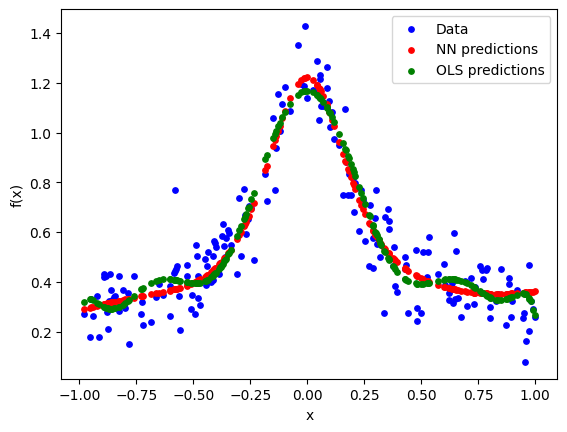

In [8]:
targets = y_test + y_offset

predictions = NN.predict(x_test_s)
print('NN mse:', MSE(targets, predictions))
print('NN R2:', R2(targets, predictions))
print('OLS mse:', MSE(targets, y_test_tilde+y_offset))
print('OLS R2:', R2(targets, y_test_tilde+y_offset))

plt.scatter(x_test, targets, label='Data', color='blue', s=15)
plt.scatter(x_test, predictions, label='NN predictions', color='red', s=15)
plt.scatter(x_test, y_test_tilde + y_offset, label='OLS predictions', color='green', s=15)
plt.legend()
plt.xlabel('x')
plt.ylabel('f(x)')  
plt.show()